> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Predict housing prices

The goal of this activity is to predict the median price (in $1,000's) of homes given their characteristics.

The [Boston Housing Prices](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) dataset is frequently used to test regression algorithms.

![Boston suburb](images/boston_housing.jpg)

The dataset contains information gathered in the 1970s concerning housing in the Boston suburban area. Each house has the following features.

| Feature | Description |
| --- | --- |
| 0 | Per capita crime rate by town |
| 1 | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| 2 | Proportion of non-retail business acres per town. |
| 3 | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| 4 | Nitric oxides concentration (parts per 10 million) |
| 5 | Average number of rooms per dwelling |
| 6 | Proportion of owner-occupied units built prior to 1940 |
| 7 | Weighted distances to five Boston employment centres |
| 8 | Index of accessibility to radial highways |
| 9 | Full-value property-tax rate per $10,000 |
| 10 | Pupil-teacher ratio by town |
| 11 | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| 12 | Lower status of the population |



## Environment setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression

scikit-learn version: 0.23.2


## Step 1: Loading the data

In [4]:
dataset = load_boston()

# Describe the dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Show a sample of raw training data
df_boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target to DataFrame
df_boston['MEDV'] = dataset.target
# Show 10 random samples
df_boston.sample(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
415,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05,7.2
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15,19.0
171,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03,19.1
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,28.0
356,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66,29.8


## Step 2: Preparing the data

### Question

Store input data and labels into the `x` and `y` variables respectively.

In [8]:
# YOUR CODE HERE
x = df_boston.drop(columns="MEDV").to_numpy()
y = df_boston["MEDV"].to_numpy()

In [9]:
print(f'x: {x.shape}. y: {y.shape}')

assert x.shape == (506, 13)
assert y.shape == (506,)

x: (506, 13). y: (506,)


### Question

Prepare data for training. Store the data subsets in variables named `x_train`/`y_train` and `x_test`/`y_test` with a 20% ratio.

In [18]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

assert x_train.shape == (404, 13)
assert y_train.shape == (404,)
assert x_test.shape == (102, 13)
assert y_test.shape == (102,)

x_train: (404, 13). y_train: (404,)
x_test: (102, 13). y_test: (102,)


### Question

Scale features by standardization while preventing information leakage from the test set. This means standardization values (mean and standard deviation) should be computed on the training set only.

In [20]:
# YOUR CODE HERE
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
mean_train = x_train.mean()
std_train = x_train.std()
print(f'mean_train: {mean_train}. std_train: {std_train}')

mean_test = x_test.mean()
std_test = x_test.std()
print(f'mean_test: {mean_test}. std_test: {std_test}')

assert np.abs(np.max(mean_train)) < 10**-6
assert np.abs(np.max(std_train - 1)) < 10**-6

mean_train: 2.0969939840597017e-15. std_train: 0.9999999999999998


## Step 3: Training a model

### Question

Create a `SGDRegressor` instance and store it into the `model` variable. Fit this model on the training data.

In [22]:
# YOUR CODE HERE
model = SGDRegressor()
model.fit(x_train, y_train)

SGDRegressor()

## Step 4: Evaluating the model

### Question

Compute the training and test MSE into the `mse_train` and `mse_test` variables respectively.

In [25]:
# YOUR CODE HERE
y_train_pred = model.predict(x_train)
mse_train = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
y_test_pred = model.predict(x_test)
mse_test = sklearn.metrics.mean_squared_error(y_test, y_test_pred)

Training MSE: 23.25. Test MSE: 17.79


Text(0.5, 1.0, &#39;Actual Prices vs Predicted Prices&#39;)

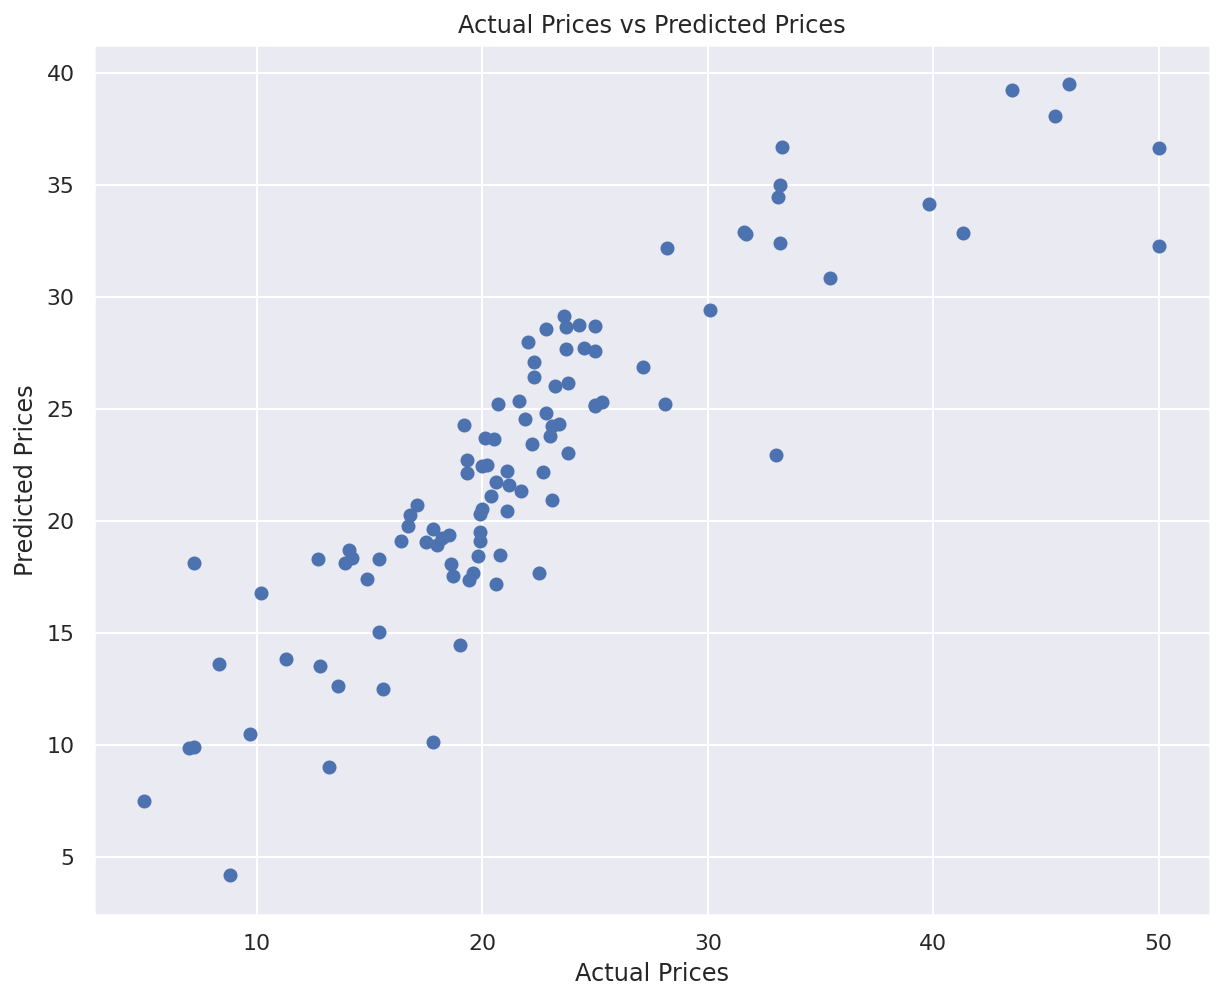

In [26]:
print (f'Training MSE: {mse_train:.2f}. Test MSE: {mse_test:.2f}')

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

### Question

Go back to step 3 and try to obtain the best possible test MSE by tweaking the `SGDRegressor` parameters.

## Step 5: Use another regression algorithm

### Question

- Create and fit a `LinearRegression` instance, which uses the normal equation instead of gradient descent.
- Compute the training and test MSE for this instance (variables `mse_train_n` and `mse_test_n`). How does it compare to the `SGDRegressor` in this case?

In [28]:
# YOUR CODE HERE
model_n = LinearRegression()
model_n.fit(x_train,y_train)

LinearRegression()

In [31]:
# YOUR CODE HERE
y_train_pred_n = model_n.predict(x_train)
mse_train_n = sklearn.metrics.mean_squared_error(y_train, y_train_pred_n)
y_test_pred_n = model_n.predict(x_test)
mse_test_n = sklearn.metrics.mean_squared_error(y_test, y_test_pred_n)

Training MSE: 23.05. Test MSE: 18.00


Text(0.5, 1.0, &#39;Actual Prices vs Predicted Prices&#39;)

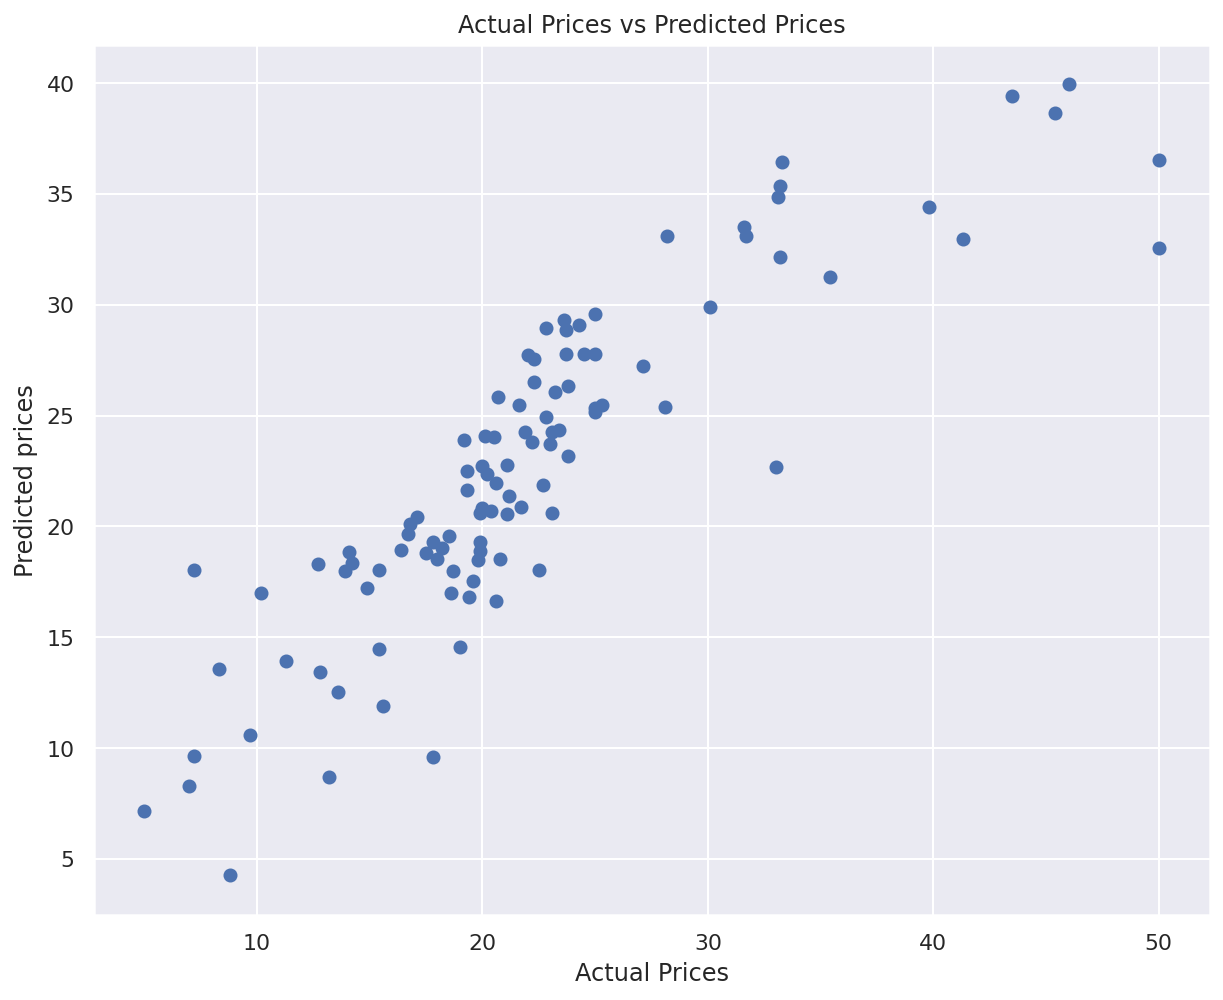

In [32]:
print (f'Training MSE: {mse_train_n:.2f}. Test MSE: {mse_test_n:.2f}')

plt.scatter(y_test, y_test_pred_n)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")